In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def generate_mixed_attribute_samples(n_samples=100, n_cat=1, n_cat_bins=5, n_cont=0):
    samples = np.zeros((n_cat * n_cat_bins + n_cont, n_samples), dtype=np.float)
    cnt = 0
    for n in range(n_cat):
        d = np.random.randint(0, n_cat_bins, size=n_samples)
        for bin in range(n_cat_bins):
            samples[bin + cnt, d==bin] = 1.
        cnt += n_cat_bins
    samples[cnt:, :] = 0.1*np.random.randn(n_cont, n_samples)
    return samples

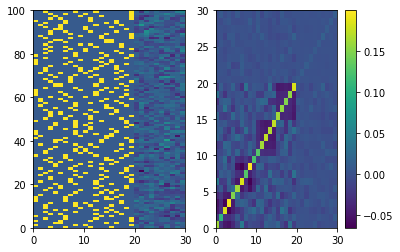

In [53]:
X = generate_mixed_attribute_samples(n_cat=4, n_cat_bins=5, n_cont=10)
C = np.cov(X)
plt.subplot(1, 2, 1)
plt.pcolor(X.T)
plt.subplot(1, 2, 2)
plt.pcolor(C)
plt.colorbar()

(30,) (30, 30)


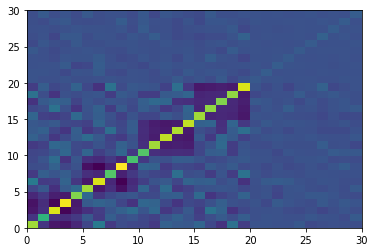

In [56]:
u, v = np.linalg.eig(C)
print(u.shape, v.shape)
plt.pcolor(v.dot(np.diag(u).dot(v.T)))